# Proyecto Final
by Matías Moré

In [213]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.set_palette(["#024059", "#66D9CD", "#D9923B", "#BF726B", "#401F1F"])



## Dataset Fumadores

Este conjunto de datos consiste en datos biologicos de distintos individuos, recolectados con el objetivo de analizar los efectos y las señales del habito tabaquico. A travez de distintas caracteristicas de estudios de laboratorio como el estado sanguineo, urinario, hepatico, higienico y su relacion con el tabaquismo, se buscara encontrar patrones que determinen biologicamente los parametros a tener en cuenta para identificar a individuos fumadores. Teniendo en cuenta estos datos se realizara una comparacion de estas variables a fin de determinar su utilidad y trascendencia para lograr este fin.

Origen del dataset: https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking?resource=download

### Definición de objetivo

En este trabajo se intenta desarrollar, a partir de los datos proporcionados, un modelo que permita predecir de la forma mas eficiente los individuos que sean fumadores.

### Contexto comercial

Se intenta elaborar una predicción a patir de las historias clínicas, para informar a los profesionales sobre si deben considerar la posibilidad de que sus pacientes sean fumadores y tomarlo en cuenta a la hora de elaborar tratamientos o indicar medicamentos.

### Problema comercial

¿Es posible, con los datos de los pacientes en nuestra base de datos de historia clinica, encontrar patrones que identifiquen hábitos tabáquicos? ¿En qué grupos de pacientes  debemos incursionar más para la prevención de tabaquismo?

### Contexto analítico

Se toman 55692 pacientes de la base de datos de historia clinica, a quienes se les identifican los estudios básicos completos y quienes cuentan con la verificacion profesional de si son fumadores o no. Estos datos se pretenden usar para encausar un modelo predictivo de aprendizaje supervisado que nos permita identificar los futuros casos de pacientes a quienes no se les determinó aún si son fumadores o no. 

### Code Acquisition

In [214]:
smoke_data = pd.read_csv("/workspaces/CoderPosta/Data/smoking.csv")
smoke_data

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


In [215]:
df = smoke_data.copy()

# Limpieza de Datos

### Nulos y Duplicados

Se verifica que no hay duplicados ni nulos.

In [216]:
print(df.isna().sum().sort_values())
print('Cant. de Duplicados ' ,df.duplicated().sum())

ID                     0
dental caries          0
oral                   0
Gtp                    0
ALT                    0
AST                    0
serum creatinine       0
Urine protein          0
hemoglobin             0
LDL                    0
HDL                    0
triglyceride           0
tartar                 0
Cholesterol            0
relaxation             0
systolic               0
hearing(right)         0
hearing(left)          0
eyesight(right)        0
eyesight(left)         0
waist(cm)              0
weight(kg)             0
height(cm)             0
age                    0
gender                 0
fasting blood sugar    0
smoking                0
dtype: int64
Cant. de Duplicados  0


### Agrupacion de Datos

In [217]:
df.dtypes

ID                       int64
gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries            int64
tartar                  object
smoking                  int64
dtype: object

Datos  Categóricos

In [218]:
categoric_col = []
for col in df.columns:
	if (df[col].nunique()<10) and (df[col].dtype=="object"):
		categoric_col.append(col) 
  
print("Categoric Col {}".format(categoric_col))

Categoric Col ['gender', 'oral', 'tartar']


Datos Continuos

In [219]:
Numeric=list(set(df.columns)- set(categoric_col))
print("Cont Col {}".format(Numeric))

Cont Col ['triglyceride', 'serum creatinine', 'systolic', 'hearing(left)', 'Urine protein', 'age', 'smoking', 'Gtp', 'relaxation', 'ID', 'weight(kg)', 'hearing(right)', 'height(cm)', 'hemoglobin', 'waist(cm)', 'fasting blood sugar', 'ALT', 'Cholesterol', 'eyesight(left)', 'dental caries', 'eyesight(right)', 'LDL', 'HDL', 'AST']


### Analisis Univariado de Datos Categóricos

se define un barplot para cada una de las variables categóricas

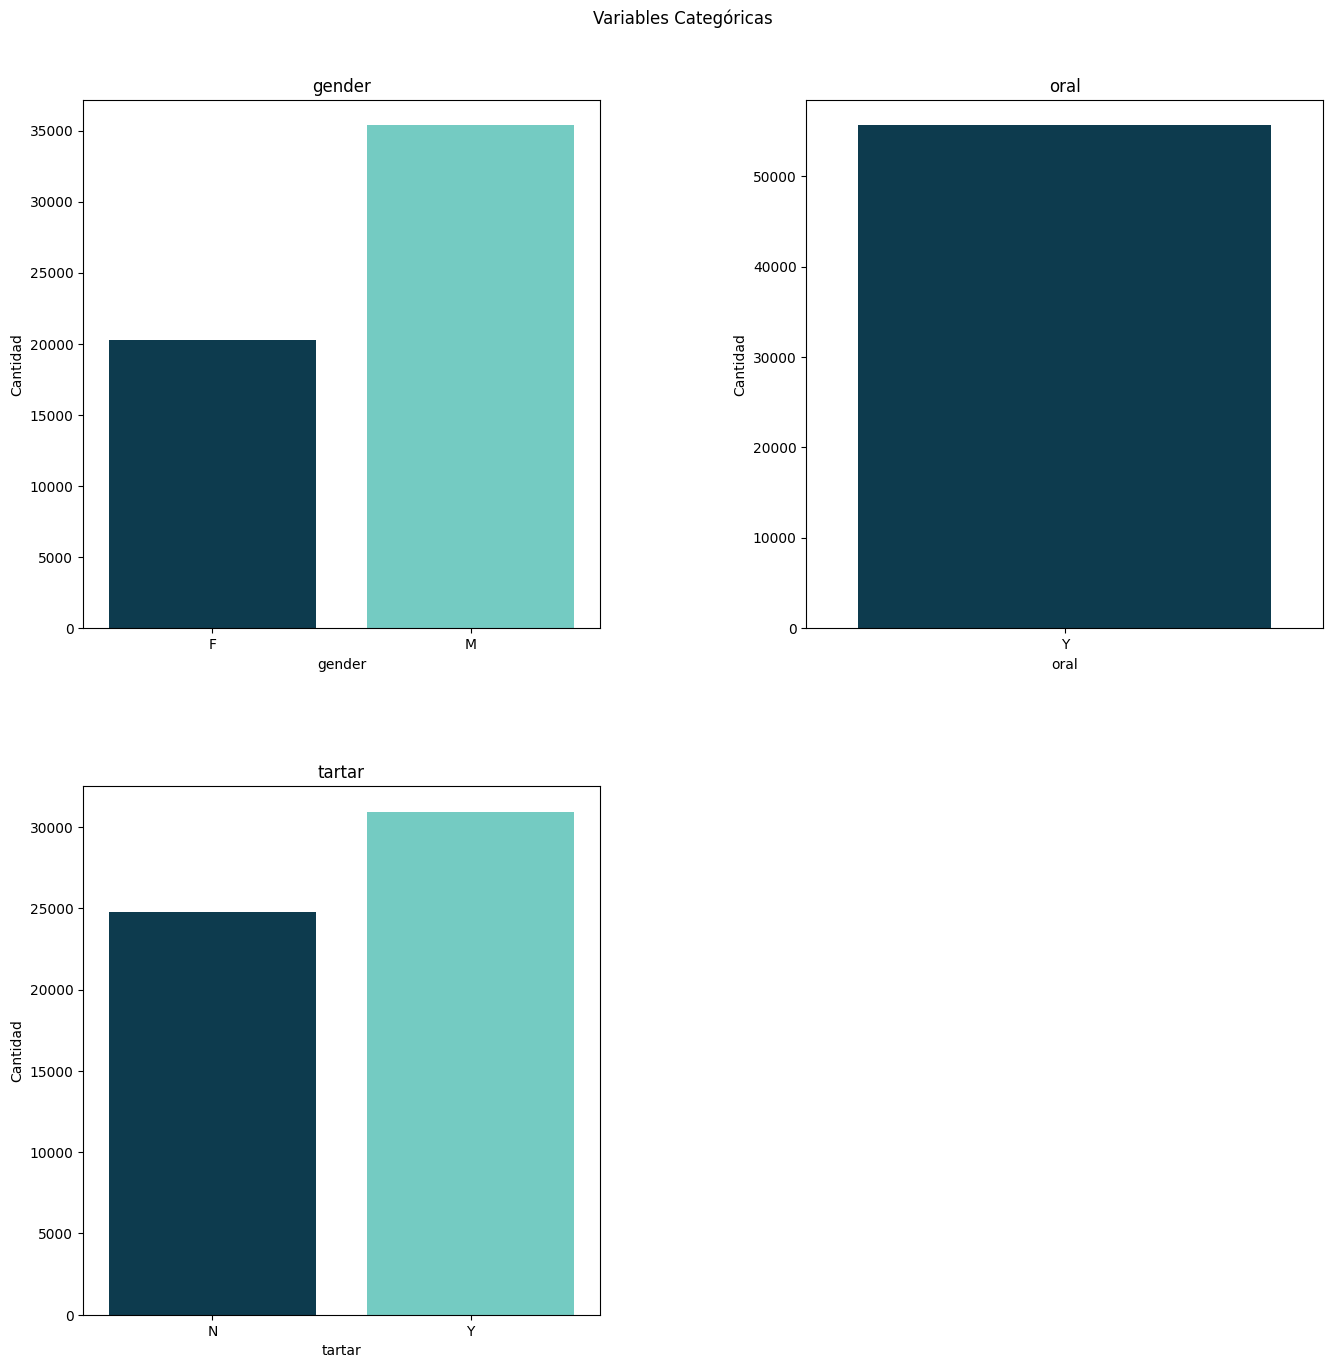

In [220]:
fig = plt.figure(figsize=[16,15])
fig.suptitle("Variables Categóricas")
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.3, wspace=0.4);
for i , columns in enumerate(categoric_col):
    input = np.unique(df[columns] , return_counts = True)
    col= 'input'
    ax1 = fig.add_subplot(2, 2, i+1);
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))
    plt.xlabel(columns)
    plt.ylabel("Cantidad")
    plt.title(columns)

Se identifica que la columna "oral" posee una sola variable unica.

In [221]:
df.nunique().sort_values()

oral                       1
smoking                    2
gender                     2
dental caries              2
hearing(left)              2
hearing(right)             2
tartar                     2
Urine protein              6
height(cm)                13
age                       14
eyesight(right)           17
eyesight(left)            19
weight(kg)                22
serum creatinine          38
relaxation                95
HDL                      126
systolic                 130
hemoglobin               145
AST                      219
ALT                      245
fasting blood sugar      276
Cholesterol              286
LDL                      289
triglyceride             390
Gtp                      488
waist(cm)                566
ID                     55692
dtype: int64

Se elimina la variable "oral" por su irrelevancia para el modelo.

In [222]:
df.drop(labels="oral", axis=1, inplace=True)
df.head(5)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0


### Análisis Bivariado de Datos Continuos

Se realiza un boxplot por cada variable continua para visualizar sus outlayers

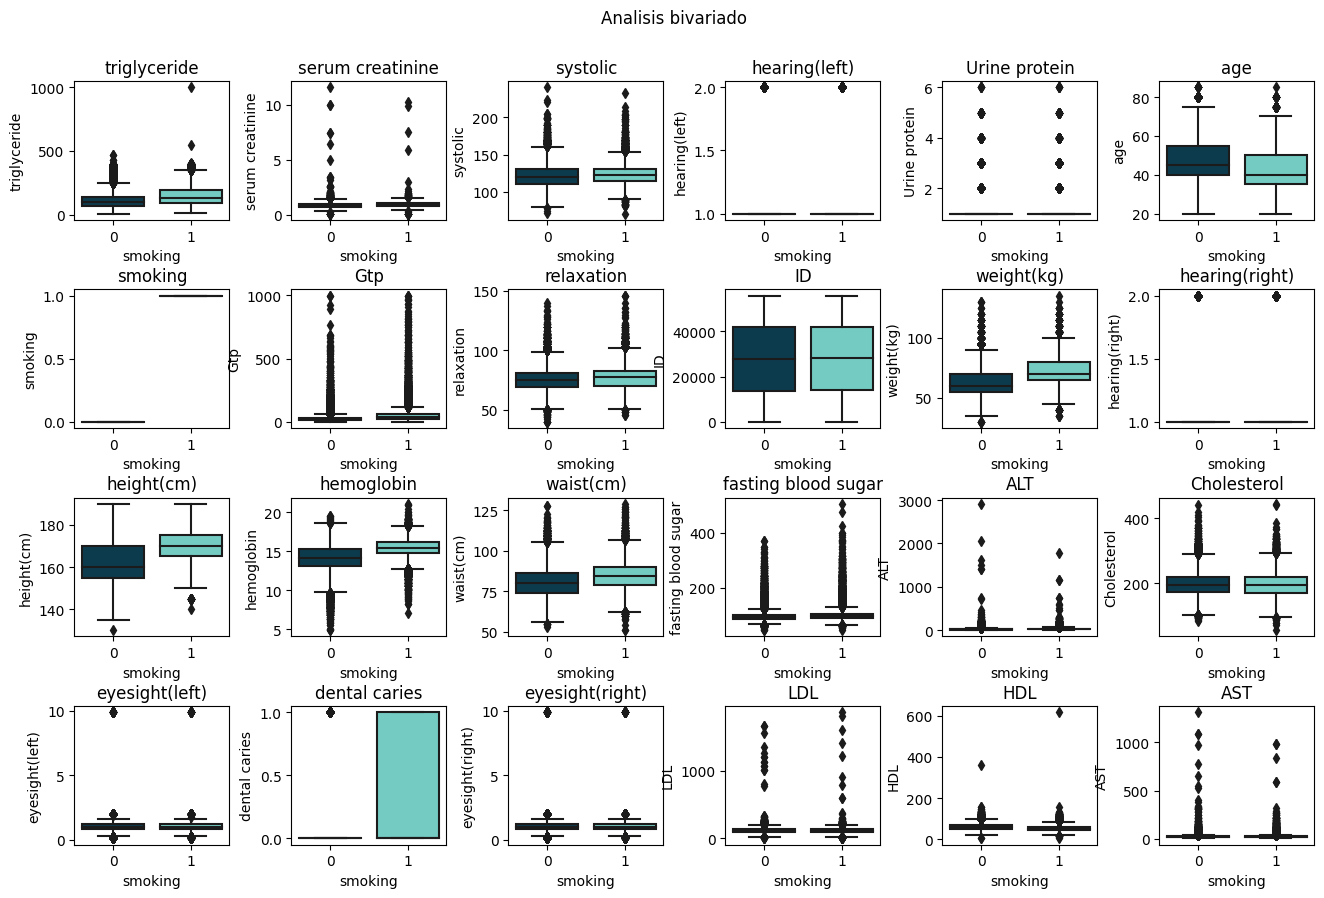

In [223]:
fig = plt.figure(figsize=[16,12])
fig.suptitle("Analisis bivariado")
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Numeric):
    a = fig.add_subplot(5, 6, i+1)
    a=sns.boxplot(x = 'smoking' , y =col , ax=a  , data = df )
    a.set_title(col)

Se delimitan los limites superior e inferior de cada boxplot

In [224]:
dict = {}
for col in Numeric:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict["upper_limit"+ "_" + col] = upper_limit
    dict["lower_limit"+ "_" + col] = lower_limit 

In [225]:
dict

{'upper_limit_triglyceride': 289.0,
 'lower_limit_triglyceride': -55.0,
 'upper_limit_serum creatinine': 1.2999999999999998,
 'lower_limit_serum creatinine': 0.5000000000000001,
 'upper_limit_systolic': 157.0,
 'lower_limit_systolic': 85.0,
 'upper_limit_hearing(left)': 1.0,
 'lower_limit_hearing(left)': 1.0,
 'upper_limit_Urine protein': 1.0,
 'lower_limit_Urine protein': 1.0,
 'upper_limit_age': 77.5,
 'lower_limit_age': 17.5,
 'upper_limit_smoking': 2.5,
 'lower_limit_smoking': -1.5,
 'upper_limit_Gtp': 82.0,
 'lower_limit_Gtp': -22.0,
 'upper_limit_relaxation': 100.0,
 'lower_limit_relaxation': 52.0,
 'upper_limit_ID': 83536.5,
 'lower_limit_ID': -27845.5,
 'upper_limit_weight(kg)': 105.0,
 'lower_limit_weight(kg)': 25.0,
 'upper_limit_hearing(right)': 1.0,
 'lower_limit_hearing(right)': 1.0,
 'upper_limit_height(cm)': 185.0,
 'lower_limit_height(cm)': 145.0,
 'upper_limit_hemoglobin': 19.1,
 'lower_limit_hemoglobin': 10.299999999999997,
 'upper_limit_waist(cm)': 106.0,
 'lower_lim

Conteo de casos en outlayers

In [226]:
for col in Numeric:
    print("Total {} de pacientes con {} menor al limite inferior.".format(len(df[df[col] < dict["lower_limit_" + col]] ) , col))
    print("Total {} de pacientes con {} mayor al limite superior.".format(len(df[df[col] > dict["upper_limit_" + col]] ) , col))

Total 0 de pacientes con triglyceride menor al limite inferior.
Total 2256 de pacientes con triglyceride mayor al limite superior.
Total 1739 de pacientes con serum creatinine menor al limite inferior.
Total 1408 de pacientes con serum creatinine mayor al limite superior.
Total 36 de pacientes con systolic menor al limite inferior.
Total 649 de pacientes con systolic mayor al limite superior.
Total 0 de pacientes con hearing(left) menor al limite inferior.
Total 1425 de pacientes con hearing(left) mayor al limite superior.
Total 0 de pacientes con Urine protein menor al limite inferior.
Total 3093 de pacientes con Urine protein mayor al limite superior.
Total 0 de pacientes con age menor al limite inferior.
Total 295 de pacientes con age mayor al limite superior.
Total 0 de pacientes con smoking menor al limite inferior.
Total 0 de pacientes con smoking mayor al limite superior.
Total 0 de pacientes con Gtp menor al limite inferior.
Total 5019 de pacientes con Gtp mayor al limite super

Se omiten del dataset aquellos datos por fuera de los limites del boxplot

In [227]:
for col in Numeric:
    df[col] = np.where(
        df[col] > dict["upper_limit_" + col], # si se comple
        dict["upper_limit_" + col], # poner limite superior (Q3+1.5IQR)
        np.where( # en caso contrario
            df[col] < dict["lower_limit_" + col], # si es menor al limite inferior
            dict["lower_limit_" + col], # poner el Q1-1.5IQR
            df[col]  # si no se cumple nada dejar quieto
        )
    )

Se verifica los cambios con el mismo gráfico.

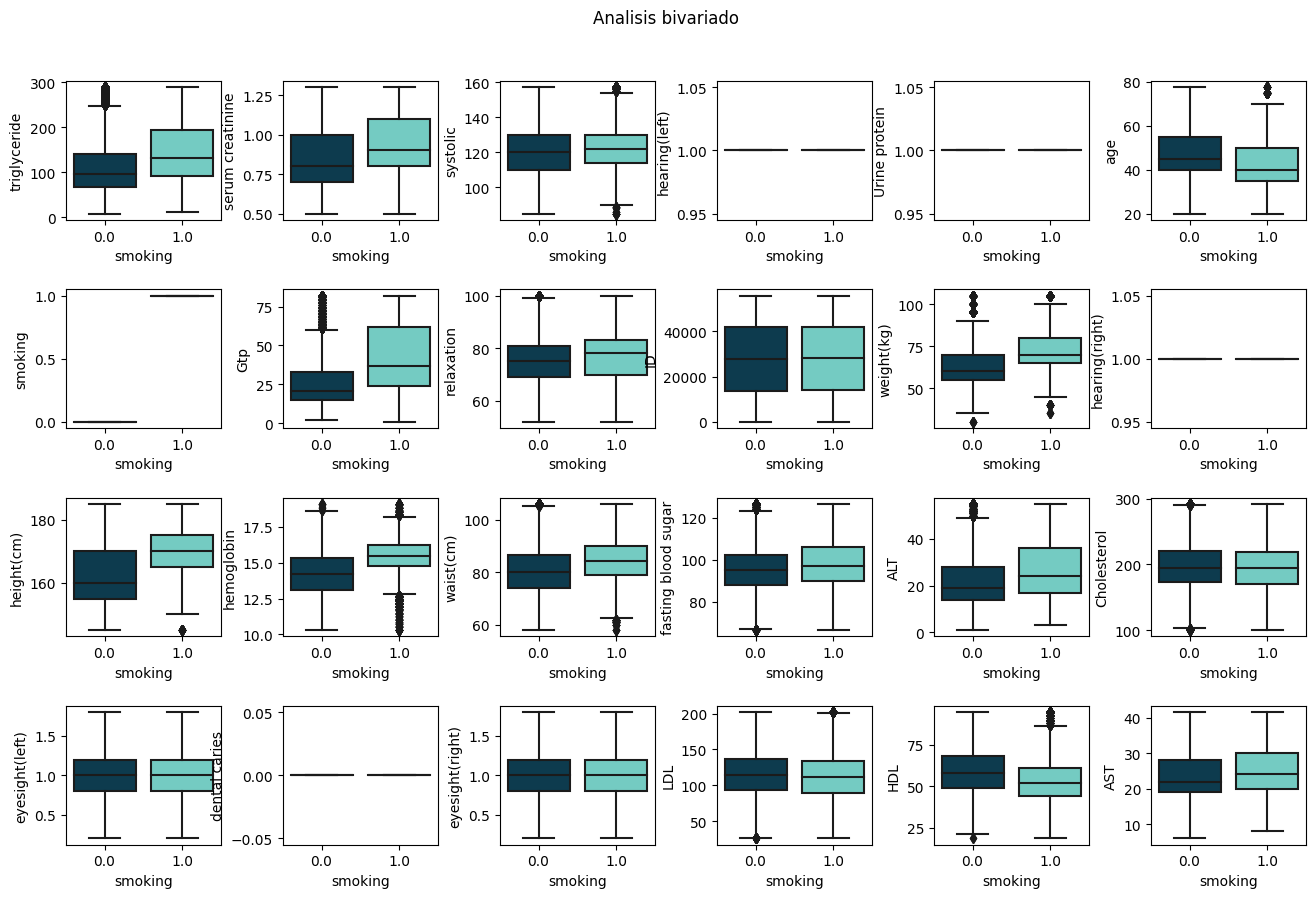

In [228]:
fig = plt.figure(figsize=[16,12])
fig.suptitle("Analisis bivariado")
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Numeric):
    a = fig.add_subplot(5, 6, i+1)
    a=sns.boxplot(x = "smoking" , y =col , ax=a  , data = df )



Por lo que se observa en los resultados las columnas "urine protein", "hearing(right)", "hearing(left)"y "dental caries" no producen informacion valiosa para el modelo asi que se eliminan del "ds"

In [229]:
df.drop(labels=["Urine protein", "hearing(right)", "hearing(left)", "dental caries", "ID"], axis=1, inplace=True)
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,...,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,tartar,smoking
0,F,40.0,155.0,60.0,81.3,1.2,1.0,114.0,73.0,94.0,...,82.0,73.0,126.0,12.9,0.7,18.0,19.0,27.0,Y,0.0
1,F,40.0,160.0,60.0,81.0,0.8,0.6,119.0,70.0,126.5,...,115.0,42.0,127.0,12.7,0.6,22.0,19.0,18.0,Y,0.0
2,M,55.0,170.0,60.0,80.0,0.8,0.8,138.0,86.0,89.0,...,182.0,55.0,151.0,15.8,1.0,21.0,16.0,22.0,N,1.0
3,M,40.0,165.0,70.0,88.0,1.5,1.5,100.0,60.0,96.0,...,254.0,45.0,202.0,14.7,1.0,19.0,26.0,18.0,Y,0.0
4,F,40.0,155.0,60.0,86.0,1.0,1.0,120.0,74.0,80.0,...,74.0,62.0,107.0,12.5,0.6,16.0,14.0,22.0,N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40.0,170.0,65.0,75.0,0.9,0.9,110.0,68.0,89.0,...,99.0,75.0,118.0,12.3,0.6,14.0,7.0,10.0,Y,0.0
55688,F,45.0,160.0,50.0,70.0,1.2,1.2,101.0,62.0,89.0,...,69.0,73.0,79.0,14.0,0.9,20.0,12.0,14.0,Y,0.0
55689,F,55.0,160.0,50.0,68.5,1.0,1.2,117.0,72.0,88.0,...,77.0,79.0,63.0,12.4,0.5,17.0,11.0,12.0,N,0.0
55690,M,60.0,165.0,60.0,78.0,0.8,1.0,133.0,76.0,107.0,...,79.0,48.0,146.0,14.4,0.7,20.0,19.0,18.0,N,0.0


In [230]:
df["height(M)"] = df["height(cm)"] / 100
df["IMC"] = df["weight(kg)"] / (df["height(M)"] ** 2)
df = df.drop(["height(M)","weight(kg)","waist(cm)"], axis = 1)

In [231]:
df['TAM'] = (df['systolic'] + 0.5 * df['relaxation']) / 2
df = df.drop(["systolic","relaxation"], axis = 1)

Se realiza la codificacion de los datos categoricos

In [232]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [233]:
from sklearn.preprocessing import RobustScaler

In [234]:
df_scaled = df.drop(["gender","tartar","smoking"], axis=1)
scaling = RobustScaler().fit_transform(df_scaled)

In [235]:
df_scaled = pd.DataFrame(scaling, columns=df_scaled.columns)

In [236]:
df = df_scaled.join(df[['gender', 'tartar', "smoking"]])

In [237]:
!pip install -q lightgbm


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [238]:
# numpy and pandas para data manipulation
import pandas as pd
import numpy as np
# model usado para feature importances
import lightgbm as lgb
# Utilidad para hacer separacion en train y test
from sklearn.model_selection import train_test_split
# visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
# manejo de memoria
import gc
# utilidades
from itertools import chain
class FeatureSelector():
    """
    Class para desarrollar  feature selection para algoritmos de machine learning o data preprocessing. 
    Implementa 5 distintos metodos para identificar features a remover
        1. Encuentra las columnas con cierto porcentaje de nulos mayor a un threshold
        2. Encuentra las columnas con solo un unico valor
        3. Encuentra variables con colinealidad con una correlacion mayor a un valor especificado
        4. Encuentra los features con  0.0 en feature importance usando una gradient boosting machine (gbm)
        5. Encuentra los valores bajos de feature importance que no ocntribuyen a la cumulative feature importance de la gbm
    Parametros
    --------
        data : dataframe
            Un dataset con observaciones y columnas ne las filas
        labels : array or series, default = None
            Arreglo de labels para entrenar el algoritmo de machine learning model para encontrar las feature importances. 
            Pueden ser labels binarios (si se trata de 'classification') o valores continuos (si la tarea es 'regression').
            Si no se proveen labels el feature importance no estara disponible.
    Attributos
    --------
    ops : dict
        Dictionary con las operaciones a correr y los features identificados para remocion
    missing_stats : dataframe
        La fraccion de missing values de todos los features 
    record_missing : dataframe
        La fracción de valores perdidos para entidades con fracción faltante por encima del umbral
    unique_stats : dataframe
        Numero de valores unicos para todos los features
    record_single_unique : dataframe
        Records de los features que solo tienen un valor unico
    corr_matrix : dataframe
        Todas las correlaciones entre todos los features de la data
    record_collinear : dataframe
        Registra los pares de variables colineales con un coeficiente de correlación por encima del umbral
    feature_importances : dataframe
        Todas cuentan los features importantes de la gradient boosting machine
    record_zero_importance : dataframe
        Registra las características de importancia cero en los datos según el gbm
    record_low_importance : dataframe
        Registra las características de menor importancia que no son necesarias para alcanzar el umbral de importancia acumulativa según el GBM

    Notas
    --------
    
        - Todas las 5 operaciones se pueden correr con el metodo `identify_all`.
        - Si usas feature importances, one-hot encoding se usa para las variables categoricas creando nuevas columnas
    """
    
    def __init__(self, data, labels=None):    
        # Dataset y opcionalmente los training labels
        self.data = data
        self.labels = labels
        if labels is None:
            print('No labels provistos. Metodos de Feature importance no estaran disponibles.')
        self.base_features = list(data.columns)
        self.one_hot_features = None
        # Dataframes que guardan la informacion de los features a remover
        self.record_missing = None
        self.record_single_unique = None
        self.record_collinear = None
        self.record_zero_importance = None
        self.record_low_importance = None   
        self.missing_stats = None
        self.unique_stats = None
        self.corr_matrix = None
        self.feature_importances = None
        # Dictionary para realizar operaciones de remoción
        self.ops = {}
        self.one_hot_correlated = False
        
    def identify_missing(self, missing_threshold):
        """Encontrar los features con una fraccion de missing values por encima del `missing_threshold`"""
        self.missing_threshold = missing_threshold
        # Calcular la fraccion de missing values en cada columna
        missing_series = self.data.isnull().sum() / self.data.shape[0]
        self.missing_stats = pd.DataFrame(missing_series).rename(columns = {'index': 'feature', 0: 'missing_fraction'})
        # Ordenar por el valor mas alto de valores missing en el top
        self.missing_stats = self.missing_stats.sort_values('missing_fraction', ascending = False)
        # Encontrar las columnas con porcentaje de missing arriba de cierto threshold
        record_missing = pd.DataFrame(missing_series[missing_series > missing_threshold]).reset_index().rename(columns = 
                                                                                                               {'index': 'feature', 
                                                                                                                0: 'missing_fraction'})
        to_drop = list(record_missing['feature'])
        self.record_missing = record_missing
        self.ops['missing'] = to_drop
        print('%d features con cantidad mayor a %0.2f en missing values.\n' % (len(self.ops['missing']), self.missing_threshold))
    def identify_single_unique(self):
        """Encontrar los features con solo un unico valor. NaNs no cuentan como valor unico. """
        # Calcular los valores unicos en cada columna
        unique_counts = self.data.nunique()
        self.unique_stats = pd.DataFrame(unique_counts).rename(columns = {'index': 'feature', 0: 'nunique'})
        self.unique_stats = self.unique_stats.sort_values('nunique', ascending = True)        
        # Encontrar las columnas con solo un unico valor 
        record_single_unique = pd.DataFrame(unique_counts[unique_counts == 1]).reset_index().rename(columns = {'index': 'feature', 
                                                                                                                0: 'nunique'})
        to_drop = list(record_single_unique['feature'])
        self.record_single_unique = record_single_unique
        self.ops['single_unique'] = to_drop
        
        print('%d features con un valor unico .\n' % len(self.ops['single_unique']))
    def identify_collinear(self, correlation_threshold, one_hot=False):
        """
        Encuentra características colineales según el coeficiente de correlación entre características.
         Para cada par de características con un coeficiente de correlación mayor que "correlation_threshold",
         sólo uno de la pareja se identifica para eliminacion        
        Este codigo esta adaptado de: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
        Parametros
        --------
        correlation_threshold : float between 0 and 1
            Valor de la correlacion de  Pearson para identificat relaciones
        one_hot : boolean, default = False
            Cuando desee usar one-hot encode para los features antes de calcular los coef. de correlacion
        """
        self.correlation_threshold = correlation_threshold
        self.one_hot_correlated = one_hot
         # Calcular la correlaciones entre cada columna
        if one_hot:
            # One hot encoding
            features = pd.get_dummies(self.data)
            self.one_hot_features = [column for column in features.columns if column not in self.base_features]
            # Agregar one hot encoded data a la data original
            self.data_all = pd.concat([features[self.one_hot_features], self.data], axis = 1)
            corr_matrix = pd.get_dummies(features).corr()
        else:
            corr_matrix = self.data.corr()
        self.corr_matrix = corr_matrix
    
        # Extraer el triangulo superior derecho de la matriz de correlacion
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        # Seleccionar los features con correlacion por encima de un threshold
        # Se necesita usar valor absoluto 
        to_drop = [column for column in upper.columns if any(upper[column].abs() > correlation_threshold)]
        # Dataframe para almacenar las parejas correlacionadas
        record_collinear = pd.DataFrame(columns = ['drop_feature', 'corr_feature', 'corr_value'])
        # Iterar sobre las columnas para eliminar los records de parejas con features correlacionados
        for column in to_drop:
            #Encontrar los features correlacionados
            corr_features = list(upper.index[upper[column].abs() > correlation_threshold])
            #Encontrar los valores correlacionados
            corr_values = list(upper[column][upper[column].abs() > correlation_threshold])
            drop_features = [column for _ in range(len(corr_features))]   
            # guardar la info (usamos un temp df por ahora)
            temp_df = pd.DataFrame.from_dict({'drop_feature': drop_features,
                                             'corr_feature': corr_features,
                                             'corr_value': corr_values})
            # Agregar a un data frame
            record_collinear = record_collinear.append(temp_df, ignore_index = True)
        self.record_collinear = record_collinear
        self.ops['collinear'] = to_drop
        
        print('%d features con una mangitud de correlacion mayor que %0.2f.\n' % (len(self.ops['collinear']), self.correlation_threshold))

    def identify_zero_importance(self, task, eval_metric=None, 
                                 n_iterations=10, early_stopping = True):
        """
        
        Identificar los features con 0 importancia acorde con la gradient boosting machine.
        El gbm puede ser entrenado con un parametro llamado early stopping usando un test de validacion para prevenir el overfitting. 
        Las feature importances se promedian sobre todas las `n_iterations` para reducir la varianza. 
        Uso de la implementacion LightGBM, pueden leer: (http://lightgbm.readthedocs.io/en/latest/index.html)
        Parametros
        -------
        eval_metric : string
            Metrica de evaluacion usada para el gradient boosting con early stopping. Debe proveerse `early_stopping` is True
        task : string
            La machine learning task, puede ser 'classification' o 'regression'
        n_iterations : int, default = 10
            Numero de iteraciones para la gradient boosting machine
        early_stopping : boolean, default = True
            Cuando o no usar early stopping con validation set cuendo se entrene
        Notes
        --------
        - Features se les aplica one-hot encoded para manipular variables categoricas antes de training.
        - El gbm no es optimizado para una tarea particular y puede ser necesario algun hyperparameter tuning
        - Las feature importances, incluyendo los importance features 0 ,pueden cambiar en diferentes corridas pero no mucho
        """
        if early_stopping and eval_metric is None:
            raise ValueError("""eval metric debe proveerse con early stopping. Algunos ejemplos "auc" para classification o
                             "l2"para regression.""")
            
        if self.labels is None:
            raise ValueError("No training labels se proveen.")
        
        # One hot encoding
        features = pd.get_dummies(self.data)
        self.one_hot_features = [column for column in features.columns if column not in self.base_features]
        # Agregar la data one hot encoded a la data original
        self.data_all = pd.concat([features[self.one_hot_features], self.data], axis = 1)
        # Extraer los feature names
        feature_names = list(features.columns)
        # Convertir a np array
        features = np.array(features)
        labels = np.array(self.labels).reshape((-1, ))
        # Empty array para feature importances
        feature_importance_values = np.zeros(len(feature_names))
        print('Entrenar el Gradient Boosting Model\n')
        # Iterate sobre cada fold
        for _ in range(n_iterations):
            if task == 'classification':
                model = lgb.LGBMClassifier(n_estimators=1000, learning_rate = 0.05, verbose = -1)
            elif task == 'regression':
                model = lgb.LGBMRegressor(n_estimators=1000, learning_rate = 0.05, verbose = -1)
            else:
                raise ValueError('La tarea deber ser "classification" o "regression"')
            # Si en entrenamiento se usa early stopping se necesita validation set
            if early_stopping:
                train_features, valid_features, train_labels, valid_labels = train_test_split(features, labels, test_size = 0.15, stratify=labels)
                # Entrenar el modelo con early stopping
                model.fit(train_features, train_labels, eval_metric = eval_metric,
                          eval_set = [(valid_features, valid_labels)],
                          early_stopping_rounds = 100, verbose = -1)
                # Limpiar memory
                gc.enable()
                del train_features, train_labels, valid_features, valid_labels
                gc.collect()
            else:
                model.fit(features, labels)
            # Guardar los feature importances
            feature_importance_values += model.feature_importances_ / n_iterations
        feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
        # Ordenar los features de acuerdo a su importancia
        feature_importances = feature_importances.sort_values('importance', ascending = False).reset_index(drop = True)
        # Normalizar las feature importances para que sumados den 1
        feature_importances['normalized_importance'] = feature_importances['importance'] / feature_importances['importance'].sum()
        feature_importances['cumulative_importance'] = np.cumsum(feature_importances['normalized_importance'])
        # Extraer los features con 0 importancia
        record_zero_importance = feature_importances[feature_importances['importance'] == 0.0]
        to_drop = list(record_zero_importance['feature'])
        self.feature_importances = feature_importances
        self.record_zero_importance = record_zero_importance
        self.ops['zero_importance'] = to_drop
        print('\n%d features con cero importancia despues de one-hot encoding.\n' % len(self.ops['zero_importance']))
    
    def identify_low_importance(self, cumulative_importance):
        """
        Encontrar los fetures con mas bajo importance usando `cumulative_importance` 
        del total de importancia obtenido del gradient boosting machine. Por ejemplo si la importancia acumulada
        es 0.95, esto retendra solo los features mas importantes necesarios para alcanzar
        95% del total de feature importance. 
        Parametros
        --------
        cumulative_importance : float between 0 and 1
            Fraccion de la importancia acumulada a tener en cuenta
        """
        self.cumulative_importance = cumulative_importance
        # Las feature importances se deben calcular primero antes de correr 
        if self.feature_importances is None:
            raise NotImplementedError("""Feature importances aun no se han determinado. 
                                         Llamar al metodo `identify_zero_importance` primero.""")
        #Asegurarse que los features mas importantes estan en el top
        self.feature_importances = self.feature_importances.sort_values('cumulative_importance')
        # Identificar los features que no son necesarios para alcanzar la cumulative_importance
        record_low_importance = self.feature_importances[self.feature_importances['cumulative_importance'] > cumulative_importance]
        to_drop = list(record_low_importance['feature'])
        self.record_low_importance = record_low_importance
        self.ops['low_importance'] = to_drop
        print('%d features requeridos para el cumulative importance de %0.2f luego one hot encoding.' % (len(self.feature_importances) -
                                                                            len(self.record_low_importance), self.cumulative_importance))
        print('%d features que no contribuyen a la cumulative importance de %0.2f.\n' % (len(self.ops['low_importance']),
                                                                                               self.cumulative_importance))
    def identify_all(self, selection_params):
        """
        Usar los 5 metodos para identificar los nombres de features a remover
        Parametros
        --------
        selection_params : dict
           Parametros a usar en los 5 feature selection methhods.
           Params puede contener los keys ['missing_threshold', 'correlation_threshold', 'eval_metric', 'task', 'cumulative_importance']
        
        """
        # Check de los parametros requeridos
        for param in ['missing_threshold', 'correlation_threshold', 'eval_metric', 'task', 'cumulative_importance']:
            if param not in selection_params.keys():
                raise ValueError('%s se requiere un parametro para este metodo.' % param)
        # Implementar cada uno de los 5 metodos
        self.identify_missing(selection_params['missing_threshold'])
        self.identify_single_unique()
        self.identify_collinear(selection_params['correlation_threshold'])
        self.identify_zero_importance(task = selection_params['task'], eval_metric = selection_params['eval_metric'])
        self.identify_low_importance(selection_params['cumulative_importance'])
        # Encontrar el numero de features a eliminar 
        self.all_identified = set(list(chain(*list(self.ops.values()))))
        self.n_identified = len(self.all_identified)  
        print('%d total de features en %d identificados para remocion despues de one-hot encoding.\n' % (self.n_identified, 
                                                                                                  self.data_all.shape[1]))
    def check_removal(self, keep_one_hot=True):
        """Check los features identificados antes de remover. Devuelve una lista de features unicos identificados."""
        self.all_identified = set(list(chain(*list(self.ops.values()))))
        print('Total de %d features identificados para remocion' % len(self.all_identified))
        if not keep_one_hot:
            if self.one_hot_features is None:
                print('Data no se le ha aplicado one-hot encoded')
            else:
                one_hot_to_remove = [x for x in self.one_hot_features if x not in self.all_identified]
                print('%d one-hot features adicionales que pueden removerse' % len(one_hot_to_remove))
        return list(self.all_identified)
        
    def remove(self, methods, keep_one_hot = True):
        """
        Elimine las características de los datos de acuerdo con los métodos especificados.
        
         Parámetros
        --------
            methods : 'all' or list of methods
                If methods == 'all', todos los metodos seran usados. En otro caso solo la seleccion que provea.
                Opciones: ['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance']
            keep_one_hot : boolean, default = True
                Cuando o no mantener los features de one-hot encoded 
        Return
        --------
            data : dataframe
                Dataframe con los features identificados removidos 
        Notes 
        --------
            - Si se utilizan características importantes, las columnas codificadas en un solo uso se agregarán a los datos (y luego se pueden eliminar)
             - ¡Compruebe las funciones que eliminarán antes de transformar los datos!
        """
        features_to_drop = []
        if methods == 'all':
            # Necesita el uso de  one-hot encoded data 
            data = self.data_all
            print('{} metodos que se han utilizado\n'.format(list(self.ops.keys())))
            # Encontrar los features unicos a remover
            features_to_drop = set(list(chain(*list(self.ops.values()))))
        else:
            # Necesita el uso de  one-hot encoded 
            if 'zero_importance' in methods or 'low_importance' in methods or self.one_hot_correlated:
                data = self.data_all
            else:
                data = self.data
            # Iterar sobre los metodos especificos 
            for method in methods:
                # Check del metodo que se ha usad
                if method not in self.ops.keys():
                    raise NotImplementedError('%s method no ha sido implementado ' % method)
                # Agregar a la lista los features identificados a remover
                else:
                    features_to_drop.append(self.ops[method])
            # Encontrar los features unicos a remover 
            features_to_drop = set(list(chain(*features_to_drop)))
        features_to_drop = list(features_to_drop)
        if not keep_one_hot:
            if self.one_hot_features is None:
                print('Data no ha sido one-hot encoded')
            else: 
                features_to_drop = list(set(features_to_drop) | set(self.one_hot_features))
        # Remover los features y devolver la data
        data = data.drop(columns = features_to_drop)
        self.removed_features = features_to_drop
        if not keep_one_hot:
        	print('Removidos %d features incluyendo one-hot features.' % len(features_to_drop))
        else:
        	print('Removidos %d features.' % len(features_to_drop))
        return data
    
    def plot_missing(self):
        """Histograma de la fraccion de missing en cada features"""
        if self.record_missing is None:
            raise NotImplementedError("Missing values no han sido calculados aun. Run `identify_missing`")
        self.reset_plot()
        # Histograma de missing values
        plt.style.use('seaborn-white')
        plt.figure(figsize = (7, 5))
        plt.hist(self.missing_stats['missing_fraction'], bins = np.linspace(0, 1, 11), edgecolor = 'k', color = 'red', linewidth = 1.5)
        plt.xticks(np.linspace(0, 1, 11));
        plt.xlabel('Missing Fraction', size = 14); plt.ylabel('Count of Features', size = 14); 
        plt.title("Fraction of Missing Values Histogram", size = 16);
    def plot_unique(self):
        """Histograma de valores unicos para cada feature"""
        if self.record_single_unique is None:
            raise NotImplementedError('Unique values no han sido calculados. Run `identify_single_unique`')
        self.reset_plot()
        # Histograma de valores unicos
        self.unique_stats.plot.hist(edgecolor = 'k', figsize = (7, 5))
        plt.ylabel('Frequency', size = 14); plt.xlabel('Unique Values', size = 14); 
        plt.title('Number of Unique Values Histogram', size = 16);
    def plot_collinear(self, plot_all = False):
        """
       Mapa de calor de los valores de correlación. Si plot_all = True traza todas las correlaciones de lo contrario
         traza solo aquellas características que tienen una correlación por encima del umbral 
        Notas
        --------
            - No todas las correlaciones trazadas están por encima del umbral porque en esta grafica
             todas las variables que han sido identificadas por tener incluso una correlación por encima del umbral
             - Las características del eje x son las que se eliminarán. Las características en el eje y
             son las características correlacionadas con las del eje x
        Codigo adaptado de https://seaborn.pydata.org/examples/many_pairwise_correlations.html
        """
        if self.record_collinear is None:
            raise NotImplementedError('Collinear features have no se han identificado. Run `identify_collinear`.')
        if plot_all:
        	corr_matrix_plot = self.corr_matrix
        	title = 'All Correlations'
        else:
	        # Identificar correlaciones por encima de un threshold
	        # columnas (x-axis) son los features a eliminar y rows (y_axis) son las parejas correlacionadas
	        corr_matrix_plot = self.corr_matrix.loc[list(set(self.record_collinear['corr_feature'])), 
	                                                list(set(self.record_collinear['drop_feature']))]
	        title = "Correlations Above Threshold"  
        f, ax = plt.subplots(figsize=(10, 8))
        # Diverging colormap
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        # Hacer el heatmap con el color bar
        sns.heatmap(corr_matrix_plot, cmap=cmap, center=0,
                    linewidths=.25, cbar_kws={"shrink": 0.6})
        # Ajustar ylabels 
        ax.set_yticks([x + 0.5 for x in list(range(corr_matrix_plot.shape[0]))])
        ax.set_yticklabels(list(corr_matrix_plot.index), size = int(160 / corr_matrix_plot.shape[0]));
        # Ajustar xlabels 
        ax.set_xticks([x + 0.5 for x in list(range(corr_matrix_plot.shape[1]))])
        ax.set_xticklabels(list(corr_matrix_plot.columns), size = int(160 / corr_matrix_plot.shape[1]));
        plt.title(title, size = 14)
    def plot_feature_importances(self, plot_n = 15, threshold = None):
        """
        Plots `plot_n` los features mas importantes teniendo enc uenta la cumulative importance.
        Si `threshold` se provee, imprime el numero de features necesarios para alcanzar el `threshold` de cumulative importance.
        Parametros
        --------
        plot_n : int, default = 15
            Número de características más importantes para graficar. El valor predeterminado es 15 o el número máximo de funciones, lo que sea menor.
        threshold : float, between 0 and 1 default = None
            Umbral para imprimir información sobre importancias acumulativas
        """
        if self.record_zero_importance is None:
            raise NotImplementedError('Feature importances no han sido determinadas. Run `idenfity_zero_importance`')
        # Necesita ajustar el número de características si es mayor que las características en los datos
        if plot_n > self.feature_importances.shape[0]:
            plot_n = self.feature_importances.shape[0] - 1
        self.reset_plot()
        # Hacer un gráfico de barras horizontales de la importancia de las características
        plt.figure(figsize = (10, 6))
        ax = plt.subplot()
        # Es necesario invertir el índice para trazar los más importantes en la parte superior.
         # Podría haber un método más eficiente para lograr esto
        ax.barh(list(reversed(list(self.feature_importances.index[:plot_n]))), 
                self.feature_importances['normalized_importance'][:plot_n], 
                align = 'center', edgecolor = 'k')
        # Set los yticks t labels
        ax.set_yticks(list(reversed(list(self.feature_importances.index[:plot_n]))))
        ax.set_yticklabels(self.feature_importances['feature'][:plot_n], size = 12)
        # Plot
        plt.xlabel('Normalized Importance', size = 16); plt.title('Feature Importances', size = 18)
        plt.show()
        # Cumulative importance plot
        plt.figure(figsize = (6, 4))
        plt.plot(list(range(1, len(self.feature_importances) + 1)), self.feature_importances['cumulative_importance'], 'r-')
        plt.xlabel('Number of Features', size = 14); plt.ylabel('Cumulative Importance', size = 14); 
        plt.title('Cumulative Feature Importance', size = 16);
        if threshold:
            # Índice de la cantidad mínima de características necesarias para el umbral de importancia acumulativa
             # np.where devuelve el índice, por lo que es necesario agregar 1 para tener el número correcto
            importance_index = np.min(np.where(self.feature_importances['cumulative_importance'] > threshold))
            plt.vlines(x = importance_index + 1, ymin = 0, ymax = 1, linestyles='--', colors = 'blue')
            plt.show();
            print('%d features requidos para un %0.2f de cumulative importance' % (importance_index + 1, threshold))
    def reset_plot(self):
        plt.rcParams = plt.rcParamsDefault

se realiza la subdivision de x e y en archivo con limpieza y sin limpieza

In [239]:
x = df.drop("smoking", axis=1)      
y = df['smoking']

In [240]:
fs = FeatureSelector(data = x, labels = y)

fs.identify_all(selection_params = {'missing_threshold': 0.7, 'correlation_threshold': 0.91, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})

0 features con cantidad mayor a 0.70 en missing values.

0 features con un valor unico .

0 features con una mangitud de correlacion mayor que 0.91.

Entrenar el Gradient Boosting Model


0 features con cero importancia despues de one-hot encoding.

16 features requeridos para el cumulative importance de 0.99 luego one hot encoding.
2 features que no contribuyen a la cumulative importance de 0.99.

2 total de features en 18 identificados para remocion despues de one-hot encoding.



In [241]:
x = fs.remove(methods = 'all', keep_one_hot = True)
x

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] metodos que se han utilizado

Removidos 2 features.


,age,height(cm),eyesight(left),eyesight(right),fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,IMC,TAM
0,0.000000,-1.0,0.50,0.00,-0.133333,0.416667,-0.302326,0.947368,0.295455,-0.863636,-1.0,-0.555556,-0.1250,0.076923,0.243247,-0.369565
1,0.000000,-0.5,-0.50,-1.00,2.033333,-0.062500,0.081395,-0.684211,0.318182,-0.954545,-1.5,-0.111111,-0.1250,-0.269231,-0.096871,-0.217391
2,1.000000,0.5,-0.50,-0.50,-0.466667,0.979167,0.860465,0.000000,0.863636,0.454545,0.5,-0.222222,-0.3125,-0.115385,-0.689289,0.956522
3,0.000000,0.0,1.25,1.25,0.000000,2.020833,1.697674,-0.526316,2.022727,-0.045455,0.5,-0.444444,0.3125,-0.269231,0.406540,-1.260870
4,0.000000,-1.0,0.00,0.00,-1.066667,-0.229167,-0.395349,0.368421,-0.136364,-1.045455,-1.5,-0.777778,-0.4375,-0.115385,0.243247,-0.086957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0.000000,0.5,-0.25,-0.25,-0.466667,0.375000,-0.104651,1.052632,0.113636,-1.136364,-1.5,-1.000000,-0.8750,-0.576923,-0.306311,-0.652174
55688,0.333333,-0.5,0.50,0.50,-0.466667,-0.604167,-0.453488,0.947368,-0.772727,-0.363636,0.0,-0.333333,-0.5625,-0.423077,-0.961562,-1.173913
55689,1.000000,-0.5,0.00,0.50,-0.533333,-0.770833,-0.360465,1.263158,-1.136364,-1.090909,-2.0,-0.666667,-0.6250,-0.500000,-0.961562,-0.260870
55690,1.333333,0.0,-0.50,0.00,0.733333,0.312500,-0.337209,-0.368421,0.750000,-0.181818,-1.0,-0.333333,-0.1250,-0.269231,-0.406540,0.521739


Preparacion de particion de testeo y de entrenamiento para ambos DF

In [242]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y  ,test_size = 0.20 , random_state = 42)

In [243]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape 

((44553, 16), (44553,), (11139, 16), (11139,))

Confeccion de modelo

In [244]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=30,criterion='gini')
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=30, random_state=42)

In [245]:
random_forest = RandomForestClassifier()

In [246]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.


In [247]:
from sklearn.model_selection import GridSearchCV

In [248]:
#Definimos los parámetros de búsqueda
params = {
    'n_estimators' : [50,100],
    'max_features': [2,4,5],
    'criterion': ['gini'], 
    'max_depth':[4,5]
}

grid_random_forest = GridSearchCV(estimator = random_forest,
                                  param_grid = params,
                                  scoring = 'neg_mean_absolute_error',  # Opciones:r2, explained_variance
                                  cv = 5, 
                                  verbose = 1, #Muestra el resultado en pantalla
                                  n_jobs = -1) # corrida en paralelo

In [249]:
%%time
#Entrenamos el modelo 
grid_random_forest.fit(x_train, y_train)
grid_random_forest.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: user 1.67 s, sys: 63.9 ms, total: 1.74 s
Wall time: 34.1 s


{'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'n_estimators': 50}

In [250]:
clf = RandomForestClassifier(max_depth=5, random_state=42, n_estimators=100,criterion='gini', max_features = 5)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_features=5, random_state=42)

Metricas

In [251]:
from sklearn import metrics

In [252]:
preds = clf.predict(x_test) 
confusion = metrics.confusion_matrix(y_test, preds)
confusion.ravel()

array([5581, 1446, 1601, 2511])

Presicion

In [253]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy 

0.7264565939491875

In [254]:
precision_positiva = metrics.precision_score(y_test, preds, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds, pos_label=0)
precision_positiva, precision_negativa 

(0.6345716451857468, 0.7770815928710666)

Sensibilidad y especificidad

In [255]:
recall_sensibilidad = metrics.recall_score(y_test, preds, pos_label=1)
recall_especificidad= metrics.recall_score(y_test, preds, pos_label=0)
recall_sensibilidad, recall_especificidad

(0.6106517509727627, 0.7942222854703287)

In [256]:
f1_positivo = metrics.f1_score(y_test, preds, pos_label=1)
f1_negativo = metrics.f1_score(y_test, preds, pos_label=0)
f1_positivo, f1_negativo 

(0.6223819556326683, 0.7855584488704341)

In [257]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.78      0.79      0.79      7027
         1.0       0.63      0.61      0.62      4112

    accuracy                           0.73     11139
   macro avg       0.71      0.70      0.70     11139
weighted avg       0.72      0.73      0.73     11139



Bad pipe message: %s [b'z8)\x18\xb4\xb0\xc9\x9b\xad+\xe9\x1d\x07=X\x00<\xe6 \x0fo\xad\x81\xa3g\xf8\xd0\x8a\xfa$\xb5\x9aC\n\x00\xa5\x82\xea\x1b\xb9\x01\xd7\xe2F\x05\xec\xd5Sl\xaa\x92\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127']
Bad pipe message: %s [b'.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00']
Bad pipe message: %s [b"\xdb\xd3\x95S\x83Z\xb5\x98\xca\x930\xa5\xa5p\xd2\xceh\x1b \x1b7p\xb7\xa8\xd5\x0f\xde\x87'^O\x07\x04\xac\x98\x84&\x88\xcf\x12bX\xe8\xe2<\x17\xd6L\xd6\x8b\x1a\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05"]
Bad pipe message: %s

### Hipótesis preliminar

Segun las pruebas realizadas deberan seleccionarse 'gender', 'height(cm)', 'waist(cm)' 'systolic', 'relaxation' y 'triglyceride'como posibles variables principales a la hora de realizar el modelo, se deberan hacer pruebas con estas variables y determinar que variables se podrian agregar al modelo.